In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import os
matplotlib.rcParams.update({'font.size': 22})
%matplotlib inline

In [2]:
dr =os.listdir(".")
print dr
dr_e = ['0_5_Pe10.txt', '0_05_Pe2.txt', '0_005_Pe10.txt', '0_05_Pe10.txt', '0_5_Pe2.txt',
       '0_005_Pe2.txt' ]

['main', 'main.cpp', 't_prof_plot.ipynb', '.FTCS.cfg.swp', 'plots', 'a.out', 'data', 'FTCS.cfg', 'test.txt', '.ipynb_checkpoints']


In [81]:
snap_shots = sorted(os.listdir("./data/snapshots/"))
print snap_shots

['0.00021_2_30_30_0.00021_1.txt', '0.00105_2_30_30_0.00021_1.txt', '0.0021_2_30_30_0.00021_1.txt', '0.00315_2_30_30_0.00021_1.txt', '0.0042_2_30_30_0.00021_1.txt', '0.00504_2_30_30_0.00021_1.txt', '0.00609_2_30_30_0.00021_1.txt', '0.00714_2_30_30_0.00021_1.txt', '0.00819_2_30_30_0.00021_1.txt', '0.00903_2_30_30_0.00021_1.txt', '0.01008_2_30_30_0.00021_1.txt', '0.02016_2_30_30_0.00021_1.txt', '0.03003_2_30_30_0.00021_1.txt', '0.04011_2_30_30_0.00021_1.txt', '0.04116_2_30_30_0.00021_1.txt', '0.04221_2_30_30_0.00021_1.txt', '0.04305_2_30_30_0.00021_1.txt', '0.0441_2_30_30_0.00021_1.txt', '0.04515_2_30_30_0.00021_1.txt', '0.0462_2_30_30_0.00021_1.txt', '0.04704_2_30_30_0.00021_1.txt', '0.04809_2_30_30_0.00021_1.txt', '0.04914_2_30_30_0.00021_1.txt', '0.05019_2_30_30_0.00021_1.txt', '0.07014_2_30_30_0.00021_1.txt', '0.09009_2_30_30_0.00021_1.txt', '0.12012_2_30_30_0.00021_1.txt', '0.20013_2_30_30_0.00021_1.txt', '0.50001_2_30_30_0.00021_1.txt', '0.70014_2_30_30_0.00021_1.txt', '0.8001_2_30_

In [4]:
dr_e.sort()
print dr_e

['0_005_Pe10.txt', '0_005_Pe2.txt', '0_05_Pe10.txt', '0_05_Pe2.txt', '0_5_Pe10.txt', '0_5_Pe2.txt']


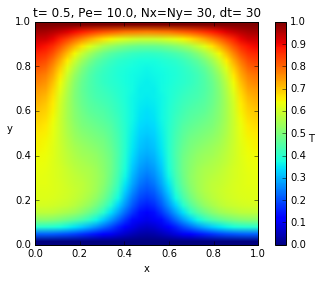

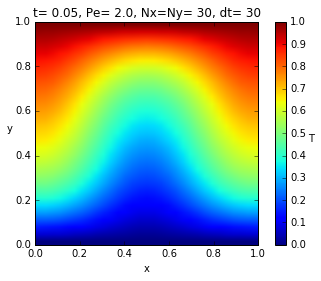

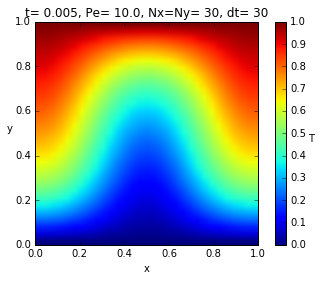

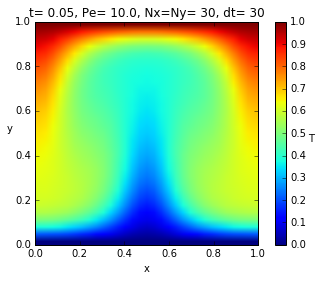

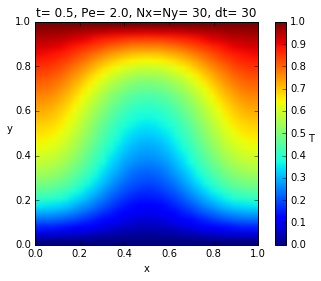

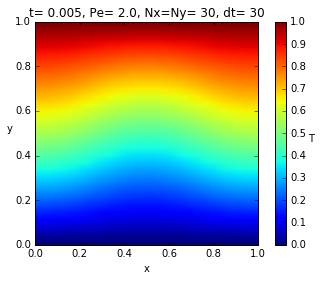

In [4]:
for fname in dr_e:
    name_tmp = fname.split('_')
    
    zeitpunkt = float("0."+name_tmp[1])
    Pe = float(name_tmp[2].split("Pe")[1].split(".")[0])
    infile = open("data/{}".format(fname), "r")
    data = np.loadtxt(infile)
    infile.close()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title("t= {}, Pe= {}, Nx=Ny= {}, dt= {}".format(zeitpunkt,Pe, 30,30,0.0002))
    ax.set_xlabel("x")
    ax.set_ylabel('y', rotation=0)
    c = ax.imshow(data, interpolation=None, extent=[0,1, 0,1])
    clb=plt.colorbar(mappable=c,ax=ax, fraction=0.0455)
    clb.set_label(label="T",rotation=0)
    fig.savefig("plots/{}.png".format(fname))

In [5]:
os.listdir('data')

['0_5_Pe10.txt',
 '0_05_Pe2.txt',
 '0_005_Pe10.txt',
 '0_05_Pe10.txt',
 '0_5_Pe2.txt',
 'SSE_0.00001.txt',
 'SSE_0.000001.txt',
 'SSE_0.0013.txt',
 '0_005.txt',
 'snapshots',
 'debug.txt',
 '0_005_Pe2.txt',
 'SSE.txt',
 'test.txt',
 'data.txt']

0.0926796666667
0.516666666667


0.08360333333299996

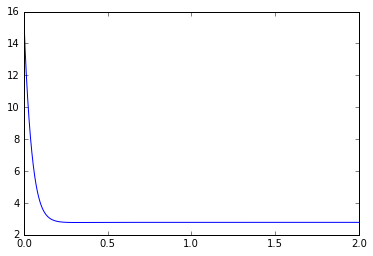

In [82]:
err_data = np.loadtxt("data/SSE_0.0002.txt")
plt.plot(err_data[:,0],err_data[:,1])
print err_data[-1,1]/30.
print err_data[0,1]/30.
0.6 -0.516396666667

0.000485106666667


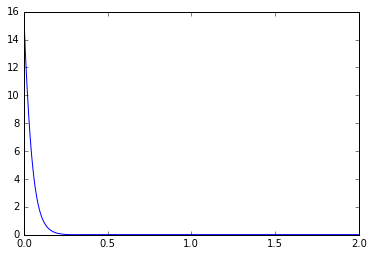

In [102]:
err_data = np.loadtxt("data/SSE_0.0002.txt")
plt.plot(err_data[:,0],err_data[:,1])
print err_data[-1,1]/30.

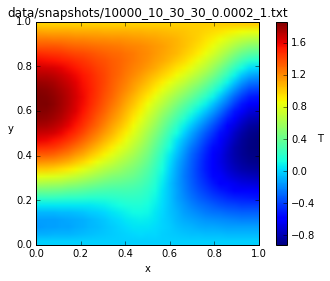

In [72]:
infile = open('data/snapshots/'+snap_shots[-1])
data = np.loadtxt(infile)
infile.close()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('data/snapshots/'+snap_shots[-1])
ax.set_xlabel("x")
ax.set_ylabel('y', rotation=0)
c = ax.imshow(data, interpolation=None, extent=[0,1, 0,1])
clb=plt.colorbar(mappable=c,ax=ax, fraction=0.0455)
clb.set_label(label="T",rotation=0)

In [74]:
def T_ij(x,y):
    return np.cos(np.pi*x)*np.sin(np.pi*y)+y
Tt=np.vectorize(T_ij)
x = np.linspace(0,1,31)
y = x
X,Y=np.meshgrid(x,y)
T=Tt(X,Y)
Pe=2.
sum1 = -Pe*np.pi*np.pi*np.sin(2.*np.pi*X)*np.cos(np.pi*Y)*np.sin(np.pi*X)*np.sin(np.pi*Y) ;
sum2 = -2.*Pe*np.pi*np.pi*np.cos(2*np.pi*X)*np.cos(np.pi*Y)*np.cos(np.pi*X)*np.sin(np.pi*Y);
sum3 = -2.*Pe*np.pi*np.cos(2.*np.pi*X)*np.sin(np.pi*Y);
sum4 = 2.*np.pi*np.pi*np.cos(np.pi*X)*np.sin(np.pi*Y);
Qij = sum1+sum2+sum3+sum4;

T_0 = Y

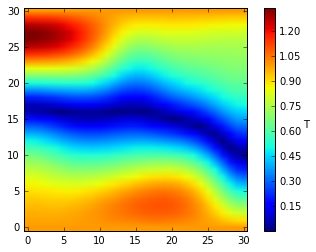

In [78]:
c = plt.imshow(np.sqrt((data-T)**2), origin='lower')
clb=plt.colorbar(mappable=c, fraction=0.0455)
clb.set_label(label="T",rotation=0)

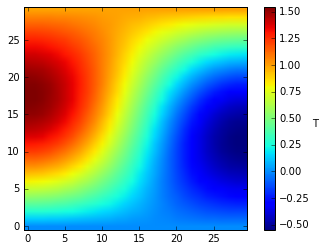

In [51]:
c = plt.imshow(T, origin='lower')
clb=plt.colorbar(mappable=c, fraction=0.0455)
clb.set_label(label="T",rotation=0)


In [70]:
c = plt.imshow(T_0, origin='lower')
clb=plt.colorbar(mappable=c, fraction=0.0455)
clb.set_label(label="T",rotation=0)

NameError: name 'T_0' is not defined

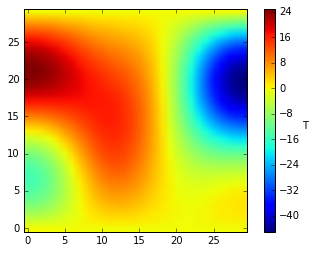

In [55]:
c = plt.imshow(Qij, origin='lower')
clb=plt.colorbar(mappable=c, fraction=0.0455)
clb.set_label(label="T",rotation=0)

In [75]:
data = np.loadtxt('data/snapshots/0.9002_2_30_30_0.0002_1.txt')
data2 = np.loadtxt('data/snapshots/0.5002_2_30_30_0.0002_1.txt')

X = np.sqrt(np.sum((data2-data)**2))/30
print X

0.0738048185893


In [43]:
#CFL Kriterium
def CFL_1(N,Pe):
    return 1./N / 3/np.pi /Pe
def CFL_2(N):
    return 1./(N**2.)/4.
CFL_1=np.vectorize(CFL_1)
CFL_2=np.vectorize(CFL_2)

0.000277777777778
12.7323954474


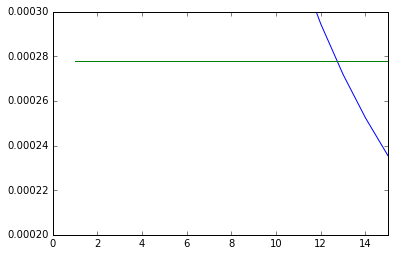

In [45]:
Pe = np.linspace(0,1000,1000)
N = 30.
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Pe[1:], CFL_1(N,Pe[1:]), label="CFL_1")
ax.plot(Pe[1:], np.ones_like(Pe[1:])*CFL_2(N), label="CFL_2")
ax.set_ylim(0.0002,0.0003)
ax.set_xlim(0,15)
print CFL_2(N)
print 4.*30./3. /np.pi